<a href="https://colab.research.google.com/github/neel-machine/LDA_Topic_Modelling/blob/main/LDA_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load Data

Data is in csv file , loading into a dataframe


In [ ]:
df = pd.read_csv('doordash_appstore_reviews.csv')
df.head()

,Unnamed: 0,title,isEdited,date,rating,review,userName,developerResponse
0,0,Recent update made it impossible to order anyt...,False,2020-11-04 01:44:52,5,I've been using door dash with dash pass for a...,Tristan the angry man,NaN
1,1,Wow! Horrible auto-response ...,False,2020-07-25 01:47:46,5,I have been using Door Dash from day one. I p...,Loyal-Patron,NaN
2,2,Great app if you want to waste your money and ...,False,2021-06-05 04:19:09,5,On multiple occasions I have had issues with d...,Yejinnie,NaN
3,3,Whatever,False,2021-11-15 23:54:46,3,I guess i can fix all my problems if i wasn’t ...,kdawg7653,NaN
4,4,Address issues,False,2021-11-06 22:38:29,3,I enjoy the DoorDash app very much. I’ve been ...,Gregory J W.,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3340 non-null   int64 
 1   title              3340 non-null   object
 2   isEdited           3340 non-null   bool  
 3   date               3340 non-null   object
 4   rating             3340 non-null   int64 
 5   review             3340 non-null   object
 6   userName           3340 non-null   object
 7   developerResponse  57 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 186.0+ KB


In [ ]:
#df = df_old.sample(800)

In [ ]:
#reviews_all = []


In [ ]:
#reviews_all[1:10]

In [ ]:
pd.set_option('display.max_colwidth',None)
df.review[:1]


0    I've been using door dash with dash pass for a few months, ordering for and with my girlfriend and family, occasionally with them paying. I support the drivers a lot as well, and I would order every day, giving generous tips and additional cash if I had it. But they just added another two factor authorization that doesn't work properly at all, and it ended in me wasting money on dash pass, on my account and my mom's account for literally no reason, and I guarantee it's causing a lot of dashers to lose money. So I called technical support and they sent me a troubleshooting list to start off with, and I followed it step by step, removing the cards, authorizing them one at a time, everything they said to do. Needless to say, their first branch of customer service was nothing short of a heaving pile of garbage. They said to wait snd try again later, so then comes the next day. I tried ordering food, with two cards with the same general info, and SHABAM, nothing happens. Well, not noth

# Prepare text for topic modelling

There are no null reviews,we have 140 reviews in total . Lets make the review text lowercase, remove stopwords, remove punctuations and apply lemmatisation.

In [ ]:
import nltk,re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
from nltk.tokenize import word_tokenize
df.rating = df.rating.astype(str)

def clean_text(text):
  text1 = text.lower()
  text = word_tokenize(text1)
  #text = re.sub(r'[%s]' % re.escape(string.punctuation),'',text) 

  table = str.maketrans('', '', string.punctuation)
  #wrds = text.split()
  stripped = [w.translate(table) for w in text]
  final = " ".join([each for each in stripped if each.isalpha()])

  #print(text)
  return final

clean_text('that’s bought extra battery')





'that s bought extra battery'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df.review = df.review.apply(lambda txt:clean_text(txt))
df.review[:1]

0    i ve been using door dash with dash pass for a few months ordering for and with my girlfriend and family occasionally with them paying i support the drivers a lot as well and i would order every day giving generous tips and additional cash if i had it but they just added another two factor authorization that does nt work properly at all and it ended in me wasting money on dash pass on my account and my mom s account for literally no reason and i guarantee it s causing a lot of dashers to lose money so i called technical support and they sent me a troubleshooting list to start off with and i followed it step by step removing the cards authorizing them one at a time everything they said to do needless to say their first branch of customer service was nothing short of a heaving pile of garbage they said to wait snd try again later so then comes the next day i tried ordering food with two cards with the same general info and shabam nothing happens well not nothing it repeatedly asks m

In [ ]:
stop_wrds = stopwords.words('english')
def remove_stopwords(txt):
  #print(txt)
  clean_txt = " ".join([wrd for wrd in txt.split() if wrd not in stop_wrds])
  return clean_txt

remove_stopwords('The city of hyderabad')


'The city hyderabad'

In [ ]:
df.review = df.review.apply(lambda x:remove_stopwords(x))


Lets create a lemmatiser. A lemmatiser converts a word into its base form for eg ringing to ring.

In [ ]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
all = []
def lemma(txt):
  doc = nlp(txt)
  for wrd in doc:
    all.append(wrd.lemma_)

  return " ".join(all)

lemma('My phone is ringing in mornings')


'my phone be ring in morning'

In [ ]:
df.review = df.review.apply(lambda x: lemma(x))
#df.review[:1]

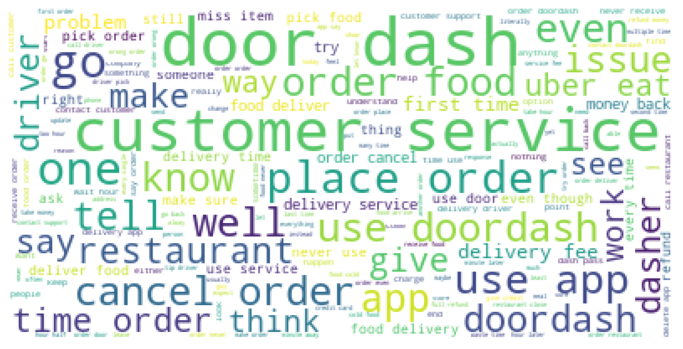

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=5000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.review))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
import gensim
from gensim import corpora

In [ ]:
reviews_all = []
def get_all_words(comment):
  #doc = nlp(comment)
  #for wrd in doc:
  reviews_all.append(comment.split())
  


In [ ]:

get_all_words("go girl , its not over untill i say its over")
reviews_all

[['go',
  'girl',
  ',',
  'its',
  'not',
  'over',
  'untill',
  'i',
  'say',
  'its',
  'over']]

In [ ]:
df.review[:1]

0    my phone be ring in morning use door dash dash pass month order girlfriend family occasionally pay support driver lot well would order every day give generous tip additional cash add another two factor authorization not work properly end waste money dash pass account mom account literally reason guarantee cause lot dasher lose money call technical support send troubleshooting list start follow step step remove card authorize one time everything say needless say first branch customer service nothing short heaving pile garbage say wait snd try later come next day try order food two card general info shabam nothing happen well nothing repeatedly ask rescan card even though do verify like time useless payment dash pass account go actual order card obviously accept work call send slightly high branch say can not anything cool guy lose literally customer one go
Name: review, dtype: object

In [ ]:
df.review.apply(lambda x: get_all_words(x)) #' '.join([comment for comment in df.review]).split() #pd.Series(df.review).apply(lambda x: x.split())


In [ ]:
reviews_all[:2]

In [ ]:
dictionary = corpora.Dictionary(reviews_all)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_all]


In [ ]:
LDA = gensim.models.ldamodel.LdaModel


In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3, 
                random_state=100,
                passes=100)

In [ ]:
lda_model.print_topics()


[(0,
  '0.040*"order" + 0.020*"food" + 0.016*"get" + 0.016*"time" + 0.015*"app" + 0.012*"driver" + 0.012*"use" + 0.012*"service" + 0.011*"doordash" + 0.011*"delivery"'),
 (1,
  '0.037*"order" + 0.021*"food" + 0.018*"get" + 0.016*"time" + 0.015*"app" + 0.013*"driver" + 0.012*"service" + 0.012*"doordash" + 0.011*"use" + 0.011*"delivery"'),
 (2,
  '0.038*"order" + 0.025*"food" + 0.018*"get" + 0.017*"time" + 0.013*"app" + 0.012*"driver" + 0.012*"doordash" + 0.012*"restaurant" + 0.011*"use" + 0.011*"say"')]

In [ ]:
!pip install pyldavis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 39.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=15fe46a8dc9aae3dbc0cb0c10705308b69892777598b2d895112821f559e1f4b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=84a8688ccf54b04dff5473cf4e58131a2222346308bf0590f317c20100bf4af2
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


In [ ]:
import pyLDAvis
from pyLDAvis import gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.022681  0.002326       1        1  35.902401
0      0.005282 -0.007696       2        1  32.947357
1      0.017398  0.005369       3        1  31.150242, topic_info=       Term           Freq          Total Category  logprob  loglift
107     tip  103088.000000  103088.000000  Default  30.0000  30.0000
10      app  385370.000000  385370.000000  Default  29.0000  29.0000
360    know   88152.000000   88152.000000  Default  28.0000  28.0000
733    home   24918.000000   24918.000000  Default  27.0000  27.0000
817   offer   42483.000000   42483.000000  Default  26.0000  26.0000
..      ...            ...            ...      ...      ...      ...
106    tell   55229.908607  191749.839458   Topic3  -5.0227  -0.0783
20   dasher   57455.882201  207798.544965   Topic3  -4.9832  -0.1192
125    dash   51625.863408  183327.085075   Topic3  -5.0902  -0.1009
239     try   46687.686616  157121.461127   Topic3  -5.1908  -0.0472
142   place   47056.258675  166930.050670   Topic3  -5.1829  -0.0999

[316 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2777      1  0.006331  acceptance
2777      2  0.694196  acceptance
2777      3  0.299386  acceptance
541       1  0.836069    activate
541       2  0.105748    activate
...     ...       ...         ...
60        2  0.313115       would
60        3  0.305716       would
158       1  0.883633         yup
158       2  0.082841         yup
158       3  0.033889         yup

[649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [ ]:
LDA()

In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=2, 
                random_state=100)

In [ ]:
lda_model.print_topics()


[(0,
  '0.042*"order" + 0.019*"food" + 0.019*"get" + 0.014*"time" + 0.014*"app" + 0.012*"use" + 0.012*"service" + 0.011*"doordash" + 0.010*"driver" + 0.010*"customer"'),
 (1,
  '0.036*"order" + 0.020*"food" + 0.020*"get" + 0.016*"app" + 0.016*"time" + 0.012*"doordash" + 0.012*"service" + 0.012*"driver" + 0.011*"use" + 0.010*"delivery"'),
 (2,
  '0.038*"order" + 0.025*"food" + 0.019*"get" + 0.017*"time" + 0.012*"doordash" + 0.012*"restaurant" + 0.012*"app" + 0.012*"driver" + 0.011*"say" + 0.010*"use"'),
 (3,
  '0.035*"order" + 0.024*"food" + 0.020*"time" + 0.015*"driver" + 0.015*"app" + 0.015*"get" + 0.014*"doordash" + 0.012*"use" + 0.012*"service" + 0.011*"say"'),
 (4,
  '0.040*"order" + 0.022*"food" + 0.016*"get" + 0.016*"app" + 0.015*"time" + 0.013*"driver" + 0.013*"delivery" + 0.012*"use" + 0.012*"doordash" + 0.011*"service"'),
 (5,
  '0.041*"order" + 0.021*"food" + 0.015*"time" + 0.015*"get" + 0.015*"app" + 0.013*"driver" + 0.012*"restaurant" + 0.011*"say" + 0.011*"delivery" + 0.01